# Deadly Visualizations!!!

![Image](../images/viz_types_portada.png)

## Setup

First we need to create a basic setup which includes:

- Importing the libraries.

- Reading the dataset file (source [Instituto Nacional de Estadística](https://www.ine.es/ss/Satellite?L=es_ES&c=Page&cid=1259942408928&p=1259942408928&pagename=ProductosYServicios%2FPYSLayout)).

- Create a couple of columns and tables for the analysis.

__NOTE:__ some functions were already created in order to help you go through the challenge. However, feel free to perform any code you might need.

In [248]:
# imports

import sys
import re
sys.path.insert(0, "../modules")

import numpy as np
import pandas as pd

import plotly.express as px
import cufflinks as cf
cf.go_offline()

import module as mod     # functions are include in module.py

In [273]:
# read dataset

deaths = pd.read_csv('../data/7947.csv', sep=';', thousands='.')

deaths.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


In [274]:
deaths['cause_code'] = deaths['Causa de muerte'].apply(mod.cause_code)
deaths['cause_group'] = deaths['Causa de muerte'].apply(mod.cause_types)
deaths['cause_name'] = deaths['Causa de muerte'].apply(mod.cause_name)
deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301158 entries, 0 to 301157
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Causa de muerte  301158 non-null  object
 1   Sexo             301158 non-null  object
 2   Edad             301158 non-null  object
 3   Periodo          301158 non-null  int64 
 4   Total            301158 non-null  int64 
 5   cause_code       301158 non-null  object
 6   cause_group      301158 non-null  object
 7   cause_name       301158 non-null  object
dtypes: int64(2), object(6)
memory usage: 18.4+ MB


In [185]:
deaths



,Año,Valores
0,2018,23
1,2019,45
2,2020,56
3,2021,78


In [164]:
len(deaths)

301158

In [218]:
deaths

,Año,Valores
0,2018,23
1,2019,45
2,2020,56
3,2021,78


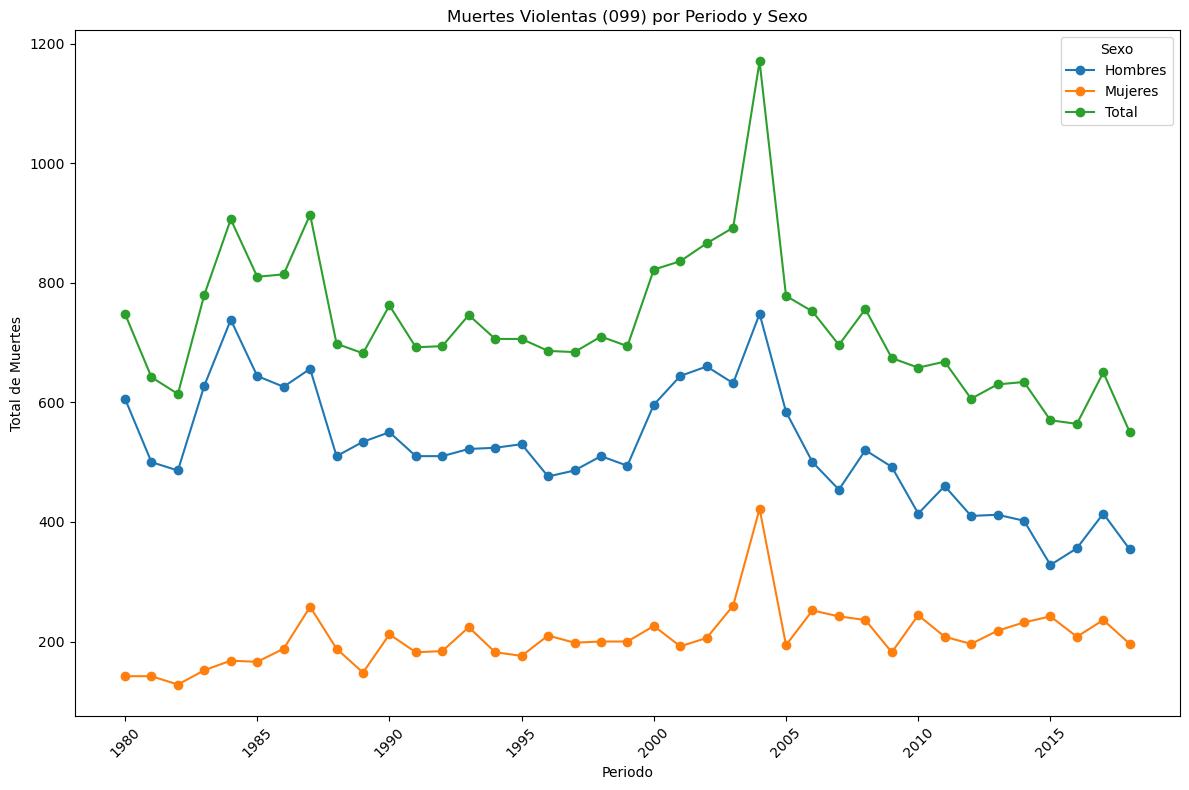

<Figure size 640x480 with 0 Axes>

In [265]:

# Filtrar las muertes violentas (código 099)
muertes_violentas = deaths[deaths['cause_code'] == '099']

# Agrupar por 'Periodo', 'Sexo' y sumar el total de muertes
df_grouped = muertes_violentas.groupby(['Periodo', 'Sexo'])['Total'].sum().unstack()

# Crear el gráfico de líneas
df_grouped.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Muertes Violentas (099) por Periodo y Sexo')
plt.xlabel('Periodo')
plt.ylabel('Total de Muertes')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../images/hola5', transparent=False, dpi=80, bbox_inches="tight", format='png')

In [115]:
df_grouped = deaths.groupby(['cause_code', 'Causa de muerte'])['Total'].sum().reset_index()

In [116]:
df_grouped

,cause_code,Causa de muerte,Total
0,001,001 Enfermedades infecciosas intestinales,68088
1,001-008,001-008 I.Enfermedades infecciosas y parasita...,984972
2,001-102,001-102 I-XXII.Todas las causas,55654432
3,002,002 Tuberculosis y sus efectos tardíos,106904
4,003,003 Enfermedad meningocócica,15940
...,...,...,...
112,098,098 Suicidio y lesiones autoinfligidas,483484
113,099,099 Agresiones (homicidio),56920
114,100,100 Eventos de intención no determinada,23180
115,101,101 Complicaciones de la atención médica y qu...,58224


In [118]:
deaths_sex = deaths.groupby(['Causa de muerte', 'Sexo',"Edad","cause_code"])['Total'].sum().reset_index()
deaths_sex  

,Causa de muerte,Sexo,Edad,cause_code,Total
0,001 Enfermedades infecciosas intestinales,Hombres,95 y más años,001,334
1,001 Enfermedades infecciosas intestinales,Hombres,De 1 a 4 años,001,62
2,001 Enfermedades infecciosas intestinales,Hombres,De 10 a 14 años,001,13
3,001 Enfermedades infecciosas intestinales,Hombres,De 15 a 19 años,001,15
4,001 Enfermedades infecciosas intestinales,Hombres,De 20 a 24 años,001,18
...,...,...,...,...,...
7717,102 Otras causas externas y sus efectos tardíos,Total,De 80 a 84 años,102,134
7718,102 Otras causas externas y sus efectos tardíos,Total,De 85 a 89 años,102,110
7719,102 Otras causas externas y sus efectos tardíos,Total,De 90 a 94 años,102,64
7720,102 Otras causas externas y sus efectos tardíos,Total,Menos de 1 año,102,0


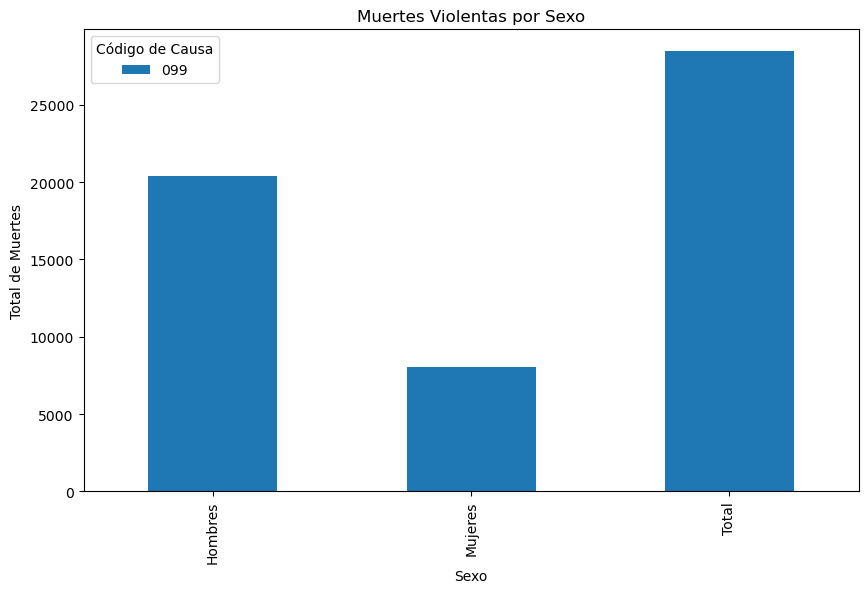

<Figure size 640x480 with 0 Axes>

In [264]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar las causas de muerte violentas (puedes ajustar esto según tus datos)
causas_violentas = ['099']  # Ejemplo de código de causa violenta

# Agrupar por 'Sexo' y 'cause_code' y sumar el total de muertes
df_grouped = deaths[deaths['cause_code'].isin(causas_violentas)].groupby(['Sexo', 'cause_code'])['Total'].sum().unstack()

# Crear el gráfico
df_grouped.plot(kind='bar', figsize=(10, 6))
plt.title('Muertes Violentas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Muertes')
plt.legend(title='Código de Causa')
plt.show()

plt.savefig('../images/hola4', transparent=False, dpi=80, bbox_inches="tight", format='png')

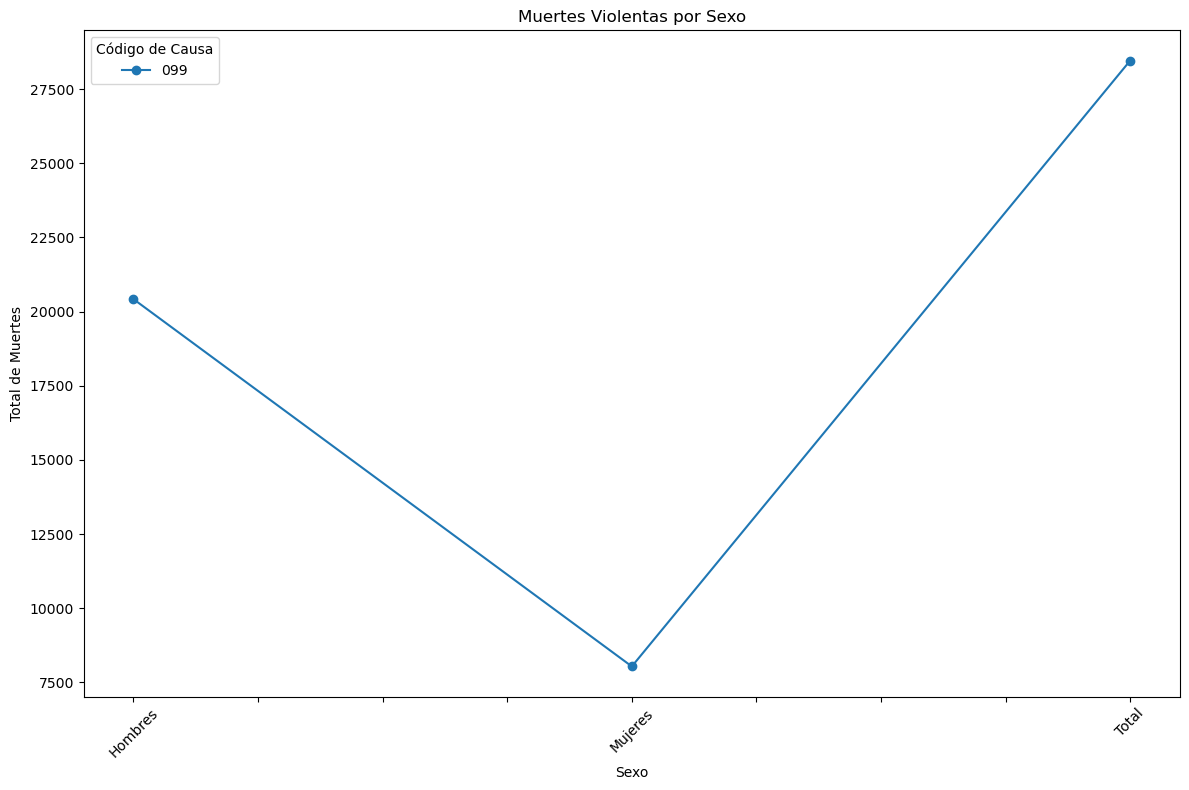

In [120]:
# Crear el gráfico de líneas
df_grouped.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Muertes Violentas por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Total de Muertes')
plt.legend(title='Código de Causa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


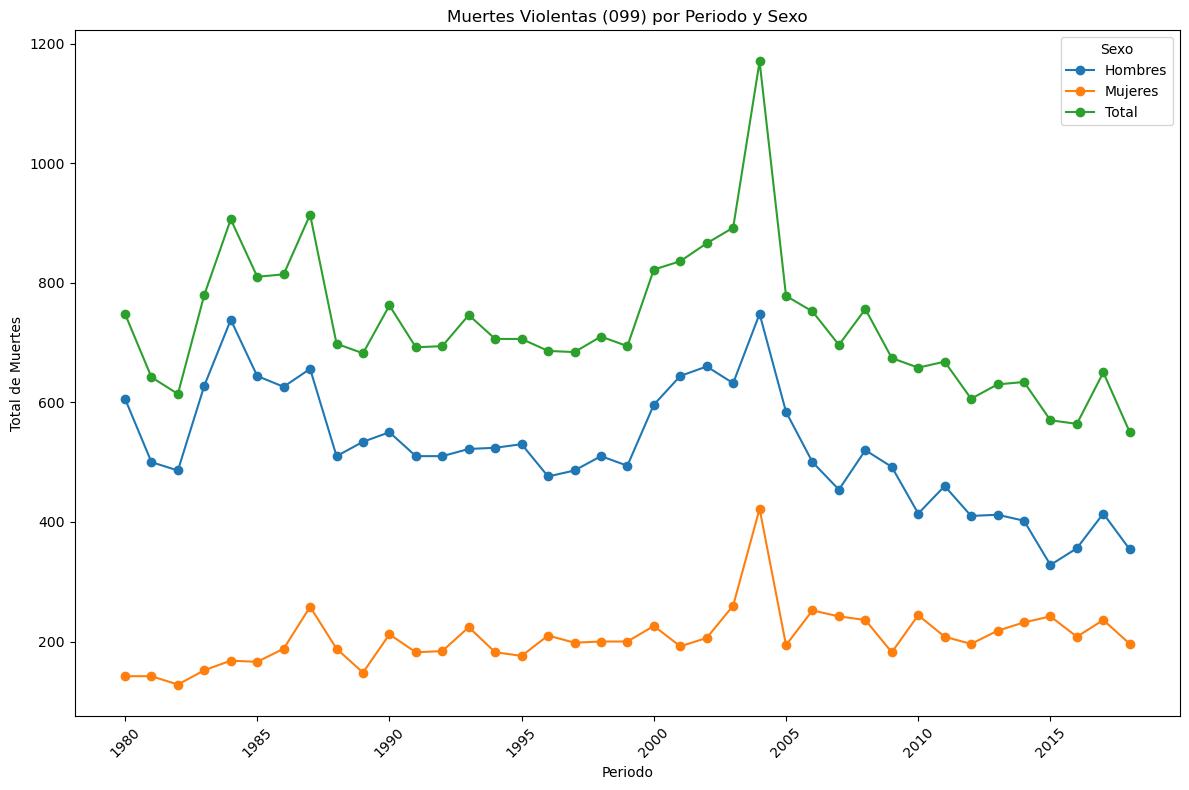

<Figure size 640x480 with 0 Axes>

In [263]:
# Filtrar las muertes violentas (código 099)
muertes_violentas = deaths[deaths['cause_code'] == '099']

# Agrupar por 'Periodo', 'Sexo' y sumar el total de muertes
df_grouped = muertes_violentas.groupby(['Periodo', 'Sexo'])['Total'].sum().unstack()

# Crear el gráfico de líneas
df_grouped.plot(kind='line', marker='o', figsize=(12, 8))
plt.title('Muertes Violentas (099) por Periodo y Sexo')
plt.xlabel('Periodo')
plt.ylabel('Total de Muertes')
plt.legend(title='Sexo')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../images/hola3', transparent=False, dpi=80, bbox_inches="tight", format='png')

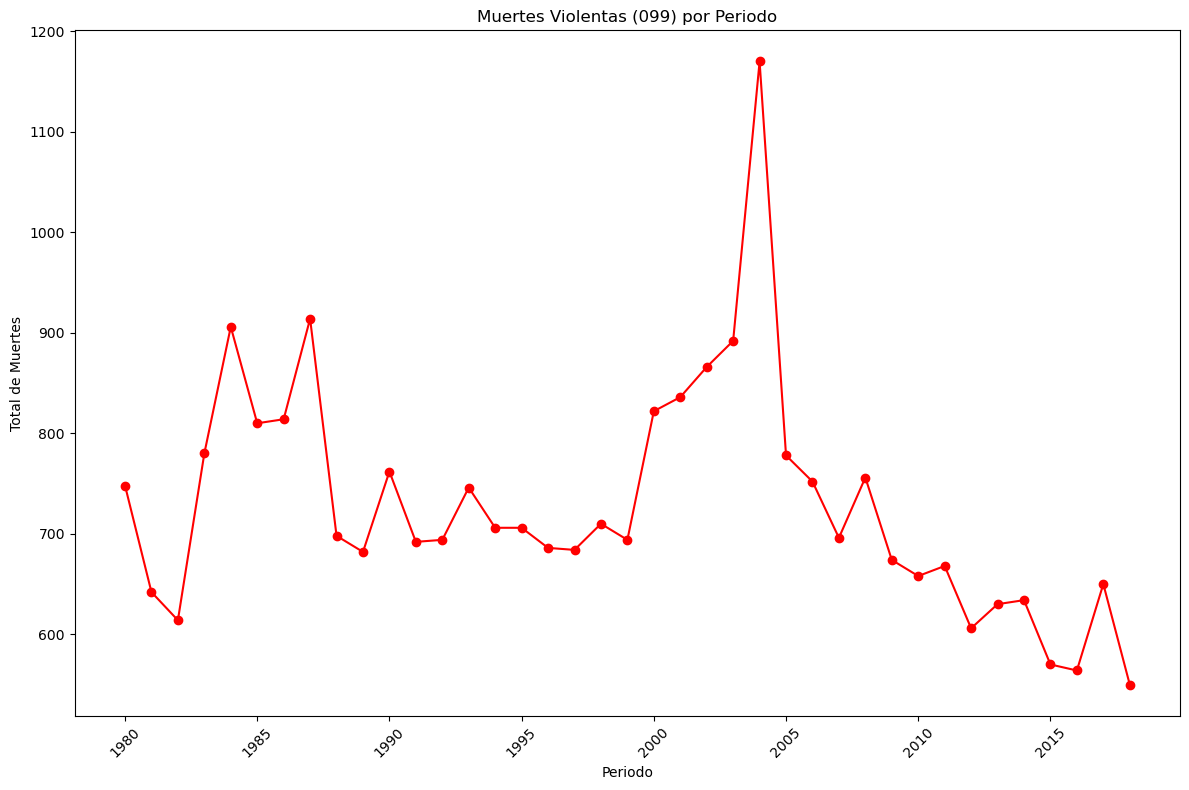

<Figure size 640x480 with 0 Axes>

In [262]:
# Filtrar las muertes violentas (código 099) y solo los totales
muertes_violentas_totales = deaths[(deaths['cause_code'] == '099') & (deaths['Sexo'] == 'Total')]

# Agrupar por 'Periodo' y sumar el total de muertes
df_grouped_totales = muertes_violentas_totales.groupby('Periodo')['Total'].sum().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
plt.plot(df_grouped_totales['Periodo'], df_grouped_totales['Total'], marker='o', linestyle='-', color='red')
plt.title('Muertes Violentas (099) por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total de Muertes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.savefig('../images/hola2', transparent=False, dpi=80, bbox_inches="tight", format='png')


In [80]:


# Filtrar las muertes violentas (código 099) y solo los totales
muertes_violentas_totales = deaths[(deaths['cause_code'] == '099') & (deaths['Sexo'] == 'Total')]

# Calcular el total de muertes violentas
total_muertes_violentas = muertes_violentas_totales['Total'].sum()

# Mostrar el resultado
print(f"Total de muertes violentas (código 099): {total_muertes_violentas}")


Total de muertes violentas (código 099): 28460


In [279]:
muertes_violentas_totales = deaths[(deaths['cause_code'] == '099') & (deaths['Sexo'] == 'Total')]
muertes_violentas_totales

,Causa de muerte,Sexo,Edad,Periodo,Total,cause_code,cause_group,cause_name
290862,099 Agresiones (homicidio),Total,Todas las edades,2018,275,099,Single cause,Agresiones (homicidio)
290863,099 Agresiones (homicidio),Total,Todas las edades,2017,325,099,Single cause,Agresiones (homicidio)
290864,099 Agresiones (homicidio),Total,Todas las edades,2016,282,099,Single cause,Agresiones (homicidio)
290865,099 Agresiones (homicidio),Total,Todas las edades,2015,285,099,Single cause,Agresiones (homicidio)
290866,099 Agresiones (homicidio),Total,Todas las edades,2014,317,099,Single cause,Agresiones (homicidio)
...,...,...,...,...,...,...,...,...
291715,099 Agresiones (homicidio),Total,95 y más años,1984,0,099,Single cause,Agresiones (homicidio)
291716,099 Agresiones (homicidio),Total,95 y más años,1983,0,099,Single cause,Agresiones (homicidio)
291717,099 Agresiones (homicidio),Total,95 y más años,1982,0,099,Single cause,Agresiones (homicidio)
291718,099 Agresiones (homicidio),Total,95 y más años,1981,0,099,Single cause,Agresiones (homicidio)


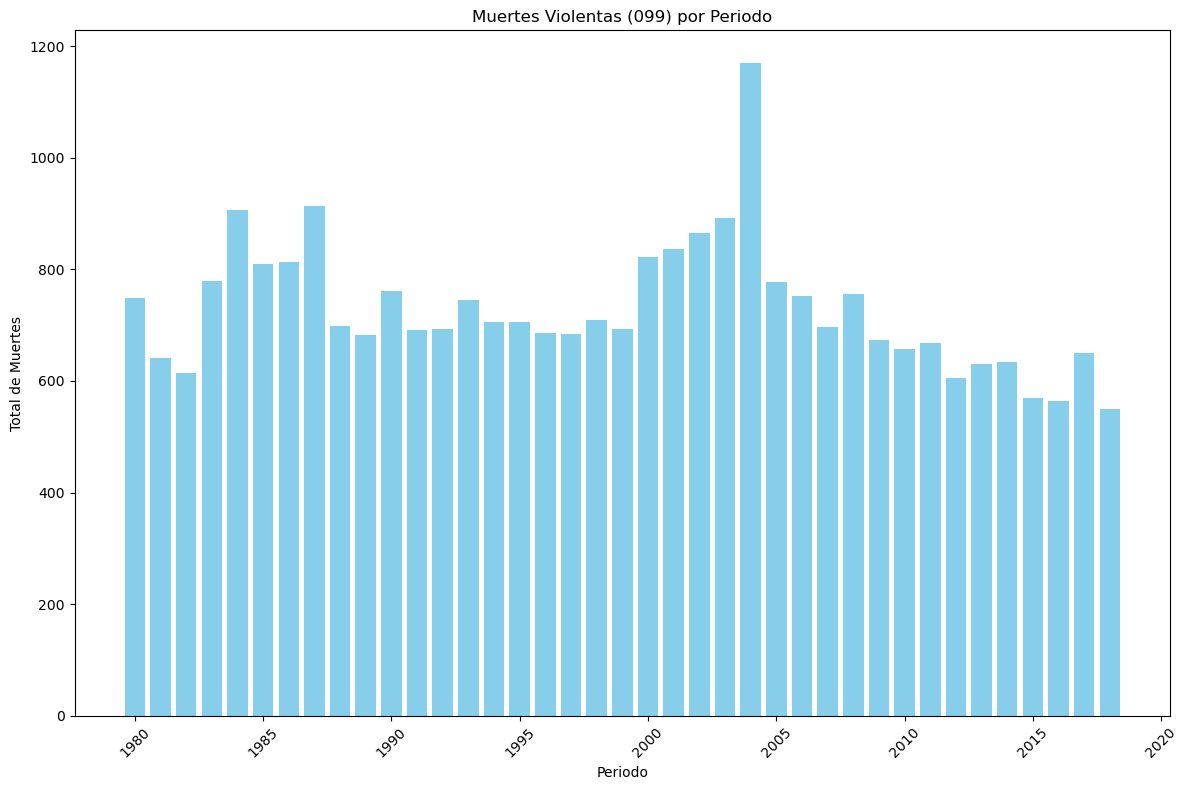

<Figure size 640x480 with 0 Axes>

In [261]:

# Filtrar las muertes violentas (código 099) y solo los totales
muertes_violentas_totales = deaths[(deaths['cause_code'] == '099') & (deaths['Sexo'] == 'Total')]

# Agrupar por 'Periodo' y sumar el total de muertes
df_grouped_periodo = muertes_violentas_totales.groupby('Periodo')['Total'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_grouped_periodo['Periodo'], df_grouped_periodo['Total'], color='skyblue')
plt.title('Muertes Violentas (099) por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total de Muertes')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

plt.savefig('../images/hola', transparent=False, dpi=80, bbox_inches="tight", format='png')



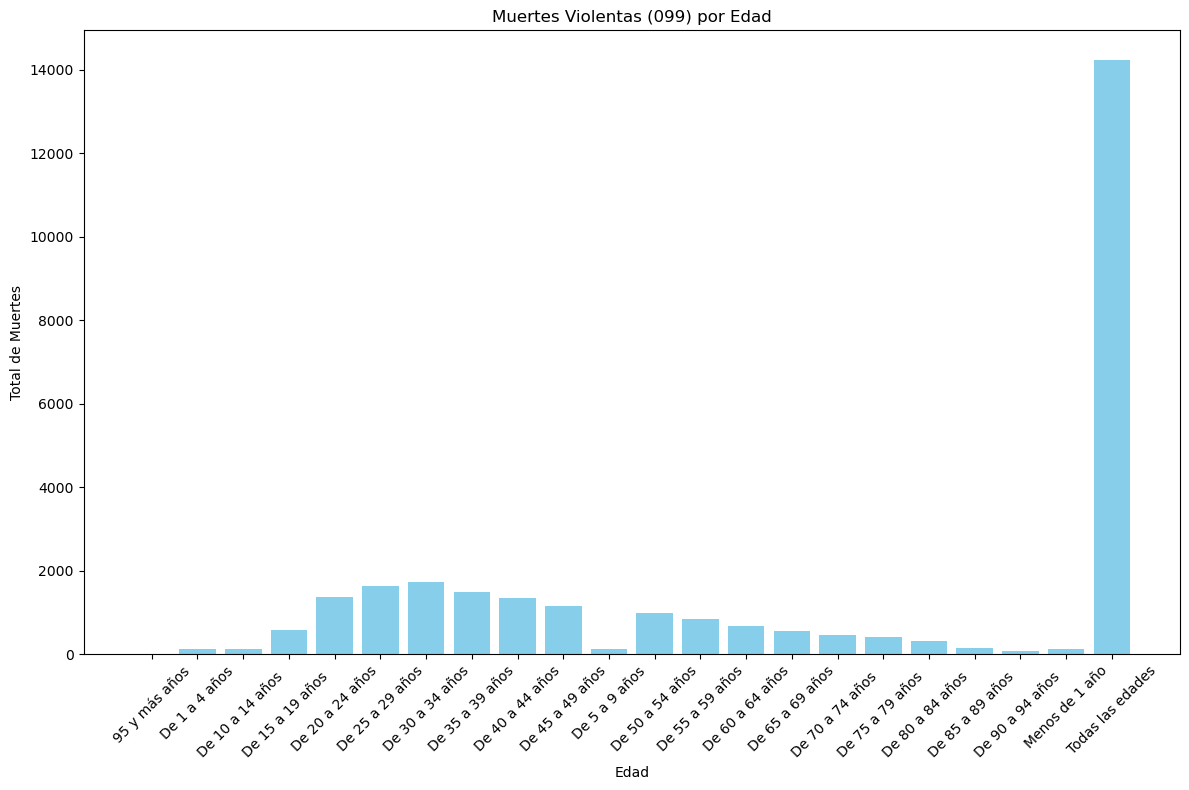

In [267]:
deaths2 = deaths.dropna(subset=['Edad'])
# Filtrar las muertes violentas (código 099) y solo los totales
muertes_violentas_totales = deaths2[(deaths2['cause_code'] == '099') & (deaths['Sexo'] == 'Total')]

# Agrupar por 'Edad' y sumar el total de muertes
df_grouped_edad = muertes_violentas_totales.groupby('Edad')['Total'].sum().reset_index()
df_grouped_edad
# Lista personalizada para ordenar las edades
orden_edad = ['Menos de 1 año', 'De 1 a 4 años', 'De 5 a 9 años', 'De 10 a 14 años', 'De 15 a 19 años', 'De 20 a 24 años', 'De 25 a 29 años', 'De 30 a 34 años', 'De 35 a 39 años', 'De 40 a 44 años', 'De 45 a 49 años', 'De 50 a 54 años', 'De 55 a 59 años', 'De 60 a 64 años', 'De 65 a 69 años', 'De 70 a 74 años', 'De 75 a 79 años', 'De 80 a 84 años', 'De 85 a 89 años', 'De 90 a 94 años', 'De 95 y más años', 'Todas las edades']



# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
plt.bar(df_grouped_edad['Edad'], df_grouped_edad['Total'], color='skyblue')
plt.title('Muertes Violentas (099) por Edad')
plt.xlabel('Edad')
plt.ylabel('Total de Muertes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [270]:
df_grouped_edad

,Edad,Total
0,95 y más años,14
1,De 1 a 4 años,115
2,De 10 a 14 años,111
3,De 15 a 19 años,586
4,De 20 a 24 años,1371
5,De 25 a 29 años,1624
6,De 30 a 34 años,1720
7,De 35 a 39 años,1490
8,De 40 a 44 años,1352
9,De 45 a 49 años,1159


In [241]:
df_grouped_edad['Edad'] = df_grouped_edad['Edad'].astype(str)
print(df_grouped_edad['Edad'])

0                  nan
1        De 1 a 4 años
2                  nan
3                  nan
4      De 20 a 24 años
5      De 25 a 29 años
6      De 30 a 34 años
7      De 35 a 39 años
8      De 40 a 44 años
9      De 45 a 49 años
10       De 5 a 9 años
11     De 50 a 54 años
12     De 55 a 59 años
13     De 60 a 64 años
14     De 65 a 69 años
15                 nan
16                 nan
17                 nan
18                 nan
19                 nan
20      Menos de 1 año
21    Todas las edades
Name: Edad, dtype: object


In [277]:
# lets check the categorical variables

var_list = ['Sexo', 'Edad', 'Periodo', 'cause_code', 'cause_name', 'cause_group']

categories = mod.cat_var(deaths, var_list)
categories

,categorical_variable,number_of_possible_values,values
0,cause_code,117,"[001-102, 001-008, 001, 002, 003, 004, 005, 00..."
1,cause_name,117,"[I-XXII.Todas las causas, I.Enfermedades infec..."
2,Periodo,39,"[2018, 2017, 2016, 2015, 2014, 2013, 2012, 201..."
3,Edad,22,"[Todas las edades, Menos de 1 año, De 1 a 4 añ..."
4,Sexo,3,"[Total, Hombres, Mujeres]"
5,cause_group,2,"[Multiple causes, Single cause]"


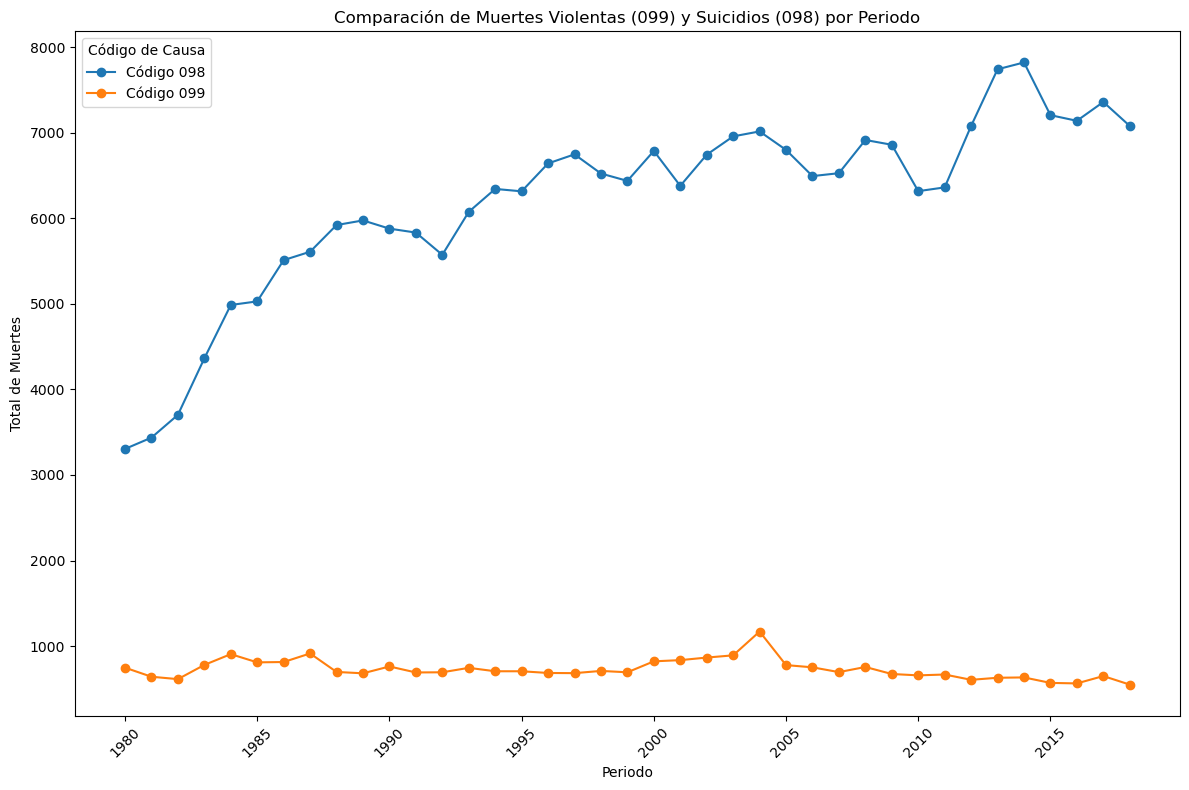

In [144]:
# Filtrar las muertes violentas (código 099) y los suicidios (código 098) y solo los totales
muertes_violentas_suicidios = deaths[(deaths['cause_code'].isin(['099', '098'])) & (deaths['Sexo'] == 'Total')]

# Agrupar por 'Periodo' y 'cause_code' y sumar el total de muertes
df_grouped = muertes_violentas_suicidios.groupby(['Periodo', 'cause_code'])['Total'].sum().unstack()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))
for cause in df_grouped.columns:
    plt.plot(df_grouped.index, df_grouped[cause], marker='o', linestyle='-', label=f'Código {cause}')

plt.title('Comparación de Muertes Violentas (099) y Suicidios (098) por Periodo')
plt.xlabel('Periodo')
plt.ylabel('Total de Muertes')
plt.legend(title='Código de Causa')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



In [276]:
# Filtrar los suicidios (código 098) y solo los totales
suicidios_totales = deaths[(deaths['cause_code'] == '098') & (deaths['Sexo'] == 'Total')]

# Calcular el total de suicidios
total_suicidios = suicidios_totales['Total'].sum()

# Mostrar el resultado
print(f"Total de suicidios (código 098): {total_suicidios}")


Total de suicidios (código 098): 241742


In [130]:
# we need also to create a causes table for the analysis

causes_table = deaths[['cause_code', 'cause_name']].drop_duplicates().sort_values(by='cause_code').reset_index(drop=True)

causes_table

,cause_code,cause_name
0,001,Enfermedades infecciosas intestinales
1,001-008,I.Enfermedades infecciosas y parasitarias
2,001-102,I-XXII.Todas las causas
3,002,Tuberculosis y sus efectos tardíos
4,003,Enfermedad meningocócica
...,...,...
112,098,Suicidio y lesiones autoinfligidas
113,099,Agresiones (homicidio)
114,100,Eventos de intención no determinada
115,101,Complicaciones de la atención médica y quirúrgica


In [129]:
# And some space for free-style Pandas!!! (e.g.: df['column_name'].unique())







## Lets make some transformations

Eventhough the dataset is pretty clean, the information is completely denormalized as you could see. For that matter a collection of methods (functions) are available in order to generate the tables you might need:

- `row_filter(df, cat_var, cat_values)` => Filter rows by any value or group of values in a categorical variable.

- `nrow_filter(df, cat_var, cat_values)` => The same but backwards. 

- `groupby_sum(df, group_vars, agg_var='Total', sort_var='Total')` => Add deaths by a certain variable.

- `pivot_table(df, col, x_axis, value='Total')`=> Make some pivot tables, you might need them...

__NOTE:__ be aware that the filtering methods can perform a filter at a time. Feel free to perform the filter you need in any way you want or feel confortable with.

In [ ]:
# Example 1
'''
dataset = mod.row_filter(deaths, 'Sexo', ['Total'])
dataset = mod.row_filter(dataset, 'Edad', ['Todas las edades'])
dataset.head()
'''

In [ ]:
# Example 2
'''
group = ['cause_code','Periodo']
dataset = mod.groupby_sum(deaths, group)
dataset.head()
'''

In [ ]:
# Example 3
'''
dataset = mod.pivot_table(dataset, 'cause_code', 'Periodo')
dataset.head()
'''

## ...and finally, show me some insights with Plotly!!!

In [ ]:
# Cufflinks histogram
'''
dataset_column.iplot(kind='hist',
                     title='VIZ TITLE',
                     yTitle='AXIS TITLE',
                     xTitle='AXIS TITLE')
'''

In [ ]:
# Cufflinks bar plot
'''
dataset_bar.iplot(kind='bar',
                  x='VARIABLE',
                  xTitle='AXIS TITLE',
                  yTitle='AXIS TITLE',
                  title='VIZ TITLE')
'''

In [ ]:
# Cufflinks line plot
'''
dataset_line.iplot(kind='line',
                   x='VARIABLE',
                   xTitle='AXIS TITLE',
                   yTitle='AXIS TITLE',
                   title='VIZ TITLE')
'''

In [ ]:
# Cufflinks scatter plot
'''
dataset_scatter.iplot(x='VARIABLE', 
                      y='VARIABLE', 
                      categories='VARIABLE',
                      xTitle='AXIS TITLE', 
                      yTitle='AXIS TITLE',
                      title='VIZ TITLE')
'''